In [5]:
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.mixture import GaussianMixture

In [6]:
# dataset = pd.read_csv('SMAI-Dataset-problem-4.3/colors.pkl')
# df = pd.DataFrame(dataset)
# df
file_path = 'SMAI-Dataset-problem-4.3/colors.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
# print("Loaded data:", data)
df = pd.DataFrame(data)
print(df)
mean_feature_1 = data[:, 0].mean()
mean_feature_2 = data[:, 1].mean()
std_feature_1 = data[:, 0].std()
std_feature_2 = data[:, 1].std()
normalized_data = np.zeros_like(data)
normalized_data[:, 0] = (data[:, 0] - mean_feature_1) / std_feature_1
normalized_data[:, 1] = (data[:, 1] - mean_feature_2) / std_feature_2

normalized_df = pd.DataFrame(normalized_data, columns=['Feature 1', 'Feature 2'])

# Print the first 5 rows of the normalized DataFrame
print("First 5 rows of the normalized DataFrame:")
print(normalized_df.head())
# print("First 5 elements of the NumPy array:")
# print(data[:5])


             0           1
0    -2.316381  126.969612
1     1.430038  127.063470
2    -0.539587  125.897475
3     0.088206  125.327145
4    -1.418890  127.049518
..         ...         ...
95  255.273892  126.049168
96  257.259152  127.536795
97  255.029443  127.718557
98  255.225916  126.930763
99  255.034111  127.479103

[100 rows x 2 columns]
First 5 rows of the normalized DataFrame:
   Feature 1  Feature 2
0  -1.419300   0.178379
1  -1.380583   0.179482
2  -1.400938   0.165769
3  -1.394450   0.159062
4  -1.410025   0.179318


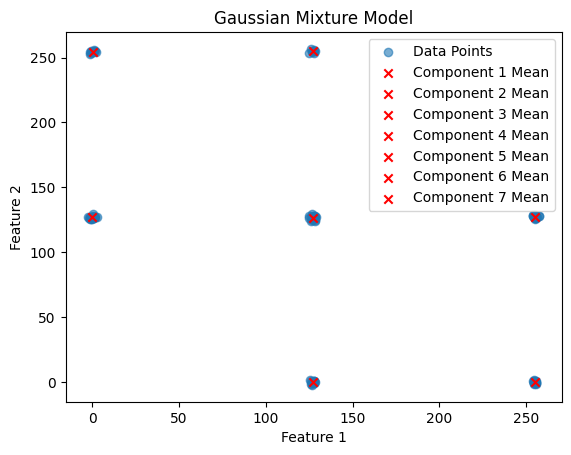

Likely color components (means):
Component 1: Mean = [ 1.27065742e+02 -8.44575440e-02]
Component 2: Mean = [126.9316877  254.85195292]
Component 3: Mean = [9.95904977e-02 1.26934805e+02]
Component 4: Mean = [255.16566837 127.35850043]
Component 5: Mean = [ 2.54828851e+02 -2.08589583e-01]
Component 6: Mean = [  0.2674397  254.51816147]
Component 7: Mean = [127.17292232 126.60536724]


In [5]:
from sklearn.mixture import GaussianMixture
# Fit a Gaussian Mixture Model
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data)

# Get the estimated means and covariances
means = gmm.means_
covariances = gmm.covariances_

# Visualize the data and the estimated Gaussian components
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Data Points')

for i in range(n_components):
    plt.scatter(means[i, 0], means[i, 1], color='red', marker='x', label=f'Component {i+1} Mean')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()
print("Likely color components (means):")
for i in range(n_components):
    print(f"Component {i+1}: Mean =", means[i])


In [11]:
# weights = 1/n_components
def generate_sample_dataset(n_components, means, covariances, num_samples_per_component):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.means_ = means
    gmm.covariances_ = covariances
    gmm.weights_ = np.ones(n_components) / n_components
    samples, _ = gmm.sample()
    samples = np.repeat(samples, num_samples_per_component, axis=0)
    return samples


# Parameters for the GMM components 
n_components = 7
means=np.array([
    [ 1.27065742e+02,-8.44575440e-02],
    [126.9316877 , 254.85195292],
    [9.95904977e-02, 1.26934805e+02],
    [255.16566837 ,127.35850043],
    [ 2.54828851e+02, -2.08589583e-01],
    [ 0.2674397,254.51816147],
    [127.17292232,126.60536724]
])
# Assuming variances are 1 
variances = np.ones((7, 2))

# Create covariance matrices
covariances = np.zeros((7, 2, 2))

for i in range(7):
    covariances[i, 0, 0] = variances[i, 0]  # Variance along x-axis
    covariances[i, 1, 1] = variances[i, 1]  # Variance along y-axis

# # Print the covariance matrices
# print("Covariance Matrices:")
# print(covariances)
num_samples_per_component = 100  # Number of samples to generate per component

# Generate the sample dataset
sample_dataset = generate_sample_dataset(n_components, means, covariances, num_samples_per_component)

# Print the generated sample dataset
print("Generated Sample Dataset (first 10 rows):")
print(sample_dataset[:10])
print("Shape of the generated sample dataset:", sample_dataset.shape)


Generated Sample Dataset (first 10 rows):
[[127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]
 [127.23163416 127.29102279]]
Shape of the generated sample dataset: (100, 2)
